### Частина перша: Знайомство з Pandas.

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)"

In [2]:
data_url = 'https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_' \
           '%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83' \
           '%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C'

In [3]:
try:
    tables = pd.read_html(data_url, match="1950—2019", thousands=None, decimal=",")
    if len(tables) > 1:
        raise ValueError("More than one table found")
    birth_table = tables[0]    
except ValueError as err:
    print(err)

* Вивести перші рядки таблиці за допомогою методу head

In [4]:
print(birth_table.head())

             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


* Визначте кількість рядків та стовпців у датафреймі (атрибут shape)

In [5]:
rows_cols_num = birth_table.shape
print(f"Number of all rows - {rows_cols_num[0]}")
print(f"Number of all columns - {rows_cols_num[1]}")

Number of all rows - 28
Number of all columns - 9


* Замініть у таблиці значення "—" на значення NaN

In [6]:
birth_table.replace(to_replace="—", value=np.NaN, inplace=True)
if birth_table.eq('—').sum().sum() == 0:  # type of sum result is numpy.int64
    print("The operation was successful")
print(birth_table)   

The operation was successful
               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   NaN
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11

* Визначте типи всіх стовпців за допомогою dataframe.dtypes

In [7]:
print(birth_table.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


* Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"

In [8]:
cols_for_type_change = [col for col in birth_table if birth_table[col].dtype == object][1:]
if cols_for_type_change:
    birth_table = birth_table.astype(dict.fromkeys(cols_for_type_change, np.float64))
print(birth_table.dtypes)

Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


* Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)

In [9]:
result = birth_table.isnull().sum(axis=0)/len(birth_table)*100  # in %
print(f"Result in %:\n-------------------\n{result}")

Result in %:
-------------------
Регіон     0.000000
1950       7.142857
1960       3.571429
1970       3.571429
1990       0.000000
2000       0.000000
2012       0.000000
2014       7.142857
2019      14.285714
dtype: float64


* Видаліть з таблиці дані по всій країні, останній рядок таблиці

In [10]:
birth_table.drop(index=(len(birth_table)-1), inplace=True)
print(birth_table.tail(n=1))

         Регіон  1950  1960  1970  1990  2000  2012  2014  2019
26  Севастополь   NaN   NaN   NaN  12.5   7.0  12.0   NaN   NaN


* Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)

In [11]:
birth_table = birth_table.fillna(birth_table.mean(numeric_only=True).round(1))
print(birth_table)

               Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0                Крим  23.0  20.6  16.0  13.0   7.3  12.6  11.1   8.0
1           Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2           Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3    Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4            Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   8.0
5         Житомирська  26.1  22.3  15.9  12.9   8.9  12.2  12.0   7.9
6        Закарпатська  31.4  27.3  20.7  16.8  11.5  15.1  14.6  10.4
7          Запорізька  21.9  19.7  15.0  12.4   7.1  10.6  10.6   6.8
8   Івано-Франківська  24.3  24.8  18.2  15.5  10.3  12.4  12.2   8.8
9            Київська  20.4  18.9  15.6  12.3   7.3  12.2  12.1   8.0
10     Кіровоградська  21.6  17.1  14.5  12.6   7.9  11.0  10.8   6.8
11          Луганська  26.2  23.5  14.4  11.6   6.2   9.6   5.1   8.0
12          Львівська  23.4  24.0  17.1  14.0   9.1  11.9  11.9   8.7
13       Миколаївськ

* Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні

In [12]:
# variant 1
ua_2019_mean = 8.1  # value from original table
print(f"Variant 1\nmean = {ua_2019_mean}\n{[region for region in birth_table.loc[birth_table['2019'] > ua_2019_mean]['Регіон']]}")
# variant 2
ua_2019_mean = birth_table["2019"].mean()  # mean of Series
print(f"\nVariant 2\nmean = {ua_2019_mean}\n{[region for region in birth_table.loc[birth_table['2019'] > ua_2019_mean]['Регіон']]}")

Variant 1
mean = 8.1
['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Чернівецька', 'Київ']

Variant 2
mean = 8.014814814814814
['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ']


* У якому регіоні була найвища народжуваність у 2014 році?

In [13]:
print(birth_table.iloc[birth_table["2014"].idxmax()]["Регіон"])

Рівненська


* Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

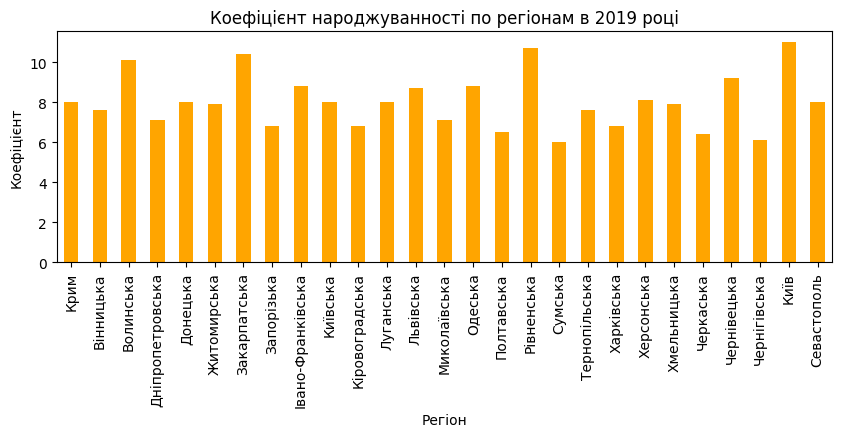

In [14]:
fig, ax = plt.subplots(figsize=(10, 3))
birth_table.plot(kind="bar", x='Регіон', y='2019', color='orange', ax=ax)
ax.legend().set_visible(False)
ax.set_title("Коефіцієнт народжуванності по регіонам в 2019 році")
ax.set_xlabel("Регіон")
ax.set_ylabel("Коефіцієнт");


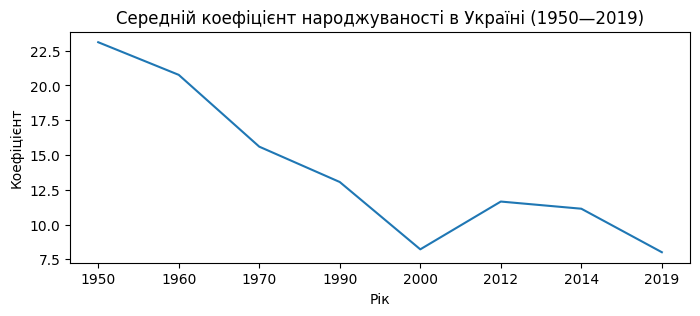

In [15]:
df1 = birth_table[birth_table.columns[1:]].mean()
fig, ax = plt.subplots(figsize=(8, 3))
df1.plot(ax=ax)
ax.set_title("Середній коефіцієнт народжуваності в Україні (1950—2019)")
ax.set_xlabel("Рік")
ax.set_ylabel("Коефіцієнт");

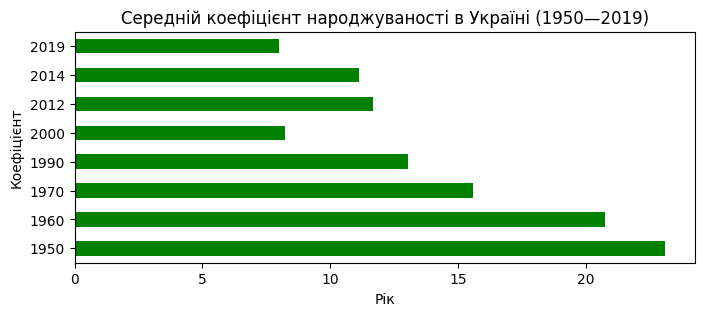

In [16]:
fig, ax = plt.subplots(figsize=(8, 3))
df1.plot(kind="barh",color="green", ax=ax)
ax.set_title("Середній коефіцієнт народжуваності в Україні (1950—2019)")
ax.set_xlabel("Рік")
ax.set_ylabel("Коефіцієнт");

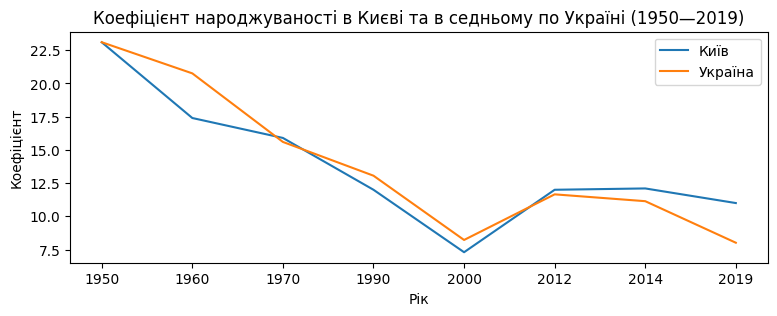

In [17]:
union_df = pd.concat([birth_table.iloc[25][1:], df1], axis=1)
union_df.columns = ["Київ", "Україна"]
fig, ax = plt.subplots(figsize=(9, 3))
union_df.plot(ax=ax)
ax.set_title("Коефіцієнт народжуваності в Києві та в седньому по Україні (1950—2019)")
ax.set_xlabel("Рік")
ax.set_ylabel("Коефіцієнт");

In [18]:
union_df

,Київ,Україна
1950,23.1,23.103704
1960,17.4,20.759259
1970,15.9,15.600000
1990,12.0,13.059259
2000,7.3,8.222222
2012,12.0,11.655556
2014,12.1,11.140741
2019,11.0,8.014815
